# Telco Customer Churn - Exploratory Data Analysis

In [1]:
import pandas as pd

In [2]:
raw_data = pd.read_csv(r"C:\Users\mertb\OneDrive\Masaüstü\customer-churn-prediction\data\raw\WA_Fn-UseC_-Telco-Customer-Churn.xls")

In [3]:
raw_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
raw_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
raw_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Missing Values Check

After inspecting the dataset, found that there are no missing (null) values in any of the columns. 

In [6]:
numeric_cols = raw_data.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [7]:
numeric_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges']

### SeniorCitizen
The 'SeniorCitizen' column is binary.
- '0' indicates the customer is not a senior.
- '1' indicates the customer is a senior.

In [8]:
numeric_cols.remove('SeniorCitizen')

In [9]:
numeric_cols

['tenure', 'MonthlyCharges']

In [10]:
catetgorical_cols = raw_data.select_dtypes(include=["object"]).columns.tolist()

In [11]:
catetgorical_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [12]:
catetgorical_cols.append('SeniorCitizen')

In [13]:
catetgorical_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn',
 'SeniorCitizen']

In [14]:
raw_data['TotalCharges'].dtype

dtype('O')

### Categorical Columns Fix
- the 'TotalCharges' column was read as a string, bu it should be treated as a numeric.
- the 'customerID' column is not useful for analysis.

In [15]:
catetgorical_cols.remove('customerID')

In [21]:
temp = pd.to_numeric(raw_data['TotalCharges'], errors='coerce')

non_numeric_values = raw_data.loc[temp.isna(), 'TotalCharges']

raw_data.loc[[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], 'TotalCharges']

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

### TotalCharges Data Issue

Upon inspection, 11 rows in the TotalCharges column were found to contain empty strings (" ").
they are not convertible to numeric and since there are only 11 rows in the TotalCharges column containing empty strings, these rows will be dropped from the dataset

In [22]:
raw_data = raw_data[raw_data['TotalCharges'].str.strip() != ""]

In [23]:
raw_data['TotalCharges'] = pd.to_numeric(raw_data['TotalCharges'])

In [24]:
catetgorical_cols.remove('TotalCharges')

In [25]:
numeric_cols.append('TotalCharges')

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

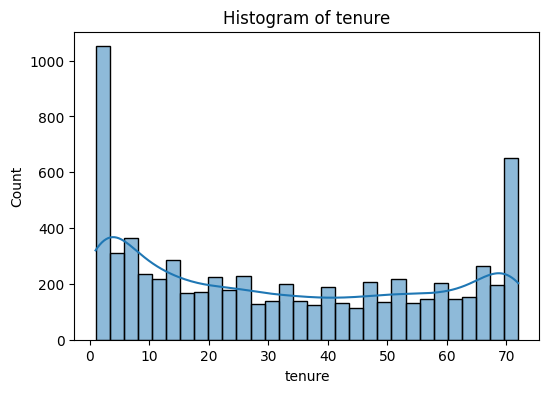

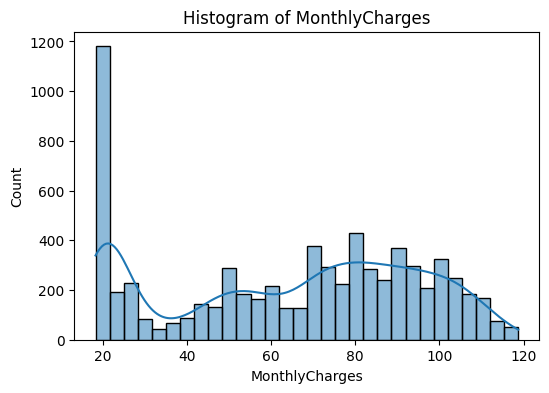

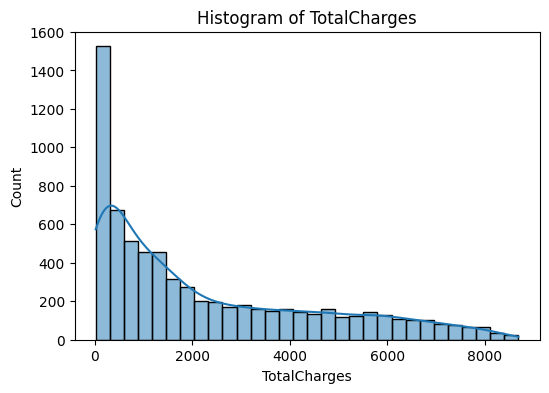

In [27]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(raw_data[col], bins=30, kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

## Tenure Distribution Observation

Upon inspecting the tenure column, it is observed that there are higher counts at the first month (tenure = 1) and the last month (maximum tenure).  

- The spike at tenure = 1 likely represents new customers.  
- The spike at the maximum tenure represents long-term customers, as the dataset ends there. 

## MonthlyCharges:  
  There is a noticeable concentration around 20, likely due to new customers who have just started using minimal services.  
  Apart from this, the distribution is fairly normal between 40 and 120.

## TotalCharges:  
  There is a pile-up between 0 and 100, again likely due to new customers.  
  Beyond that, the distribution gradually decreases up to around 9000, reflecting long-term customers.

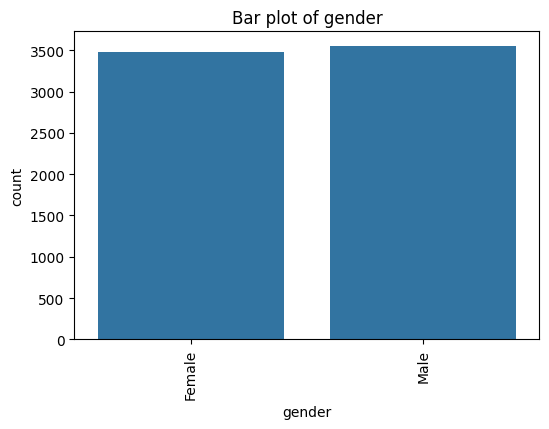

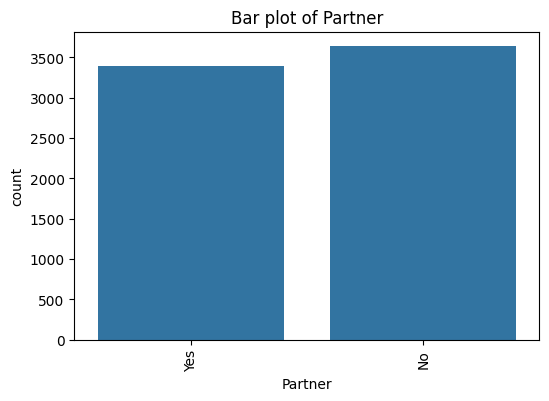

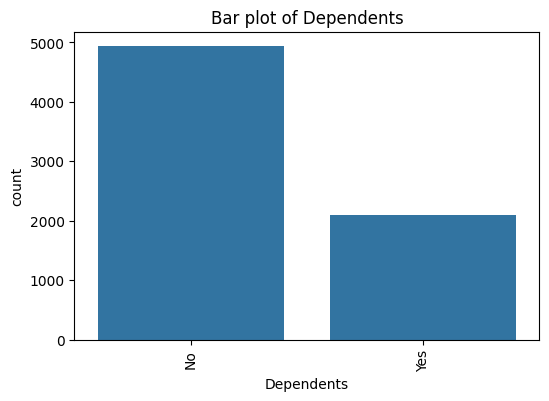

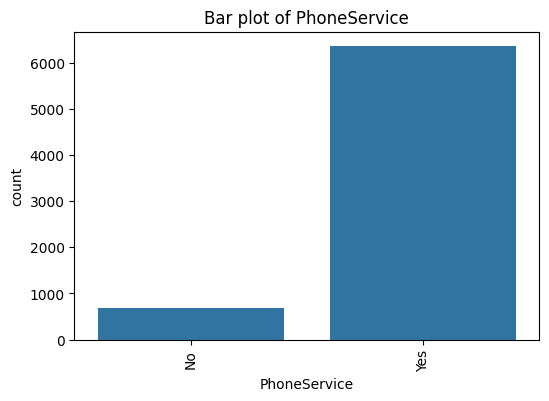

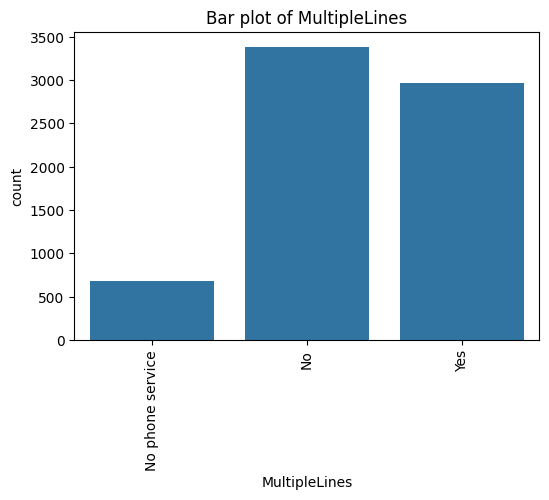

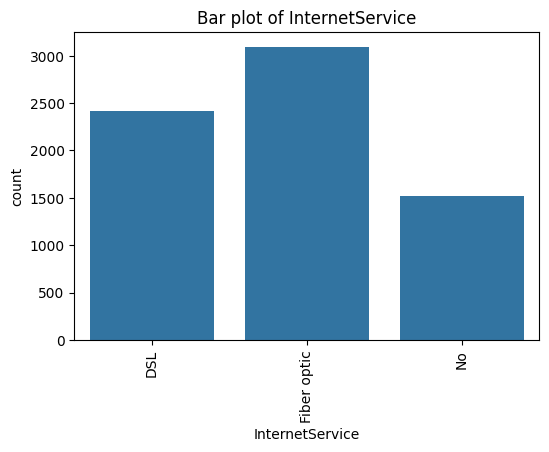

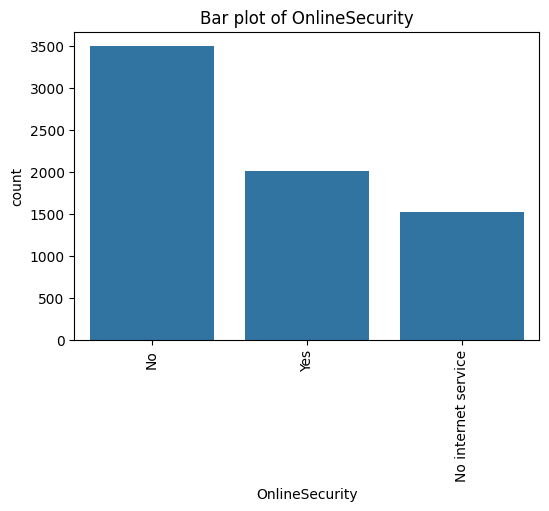

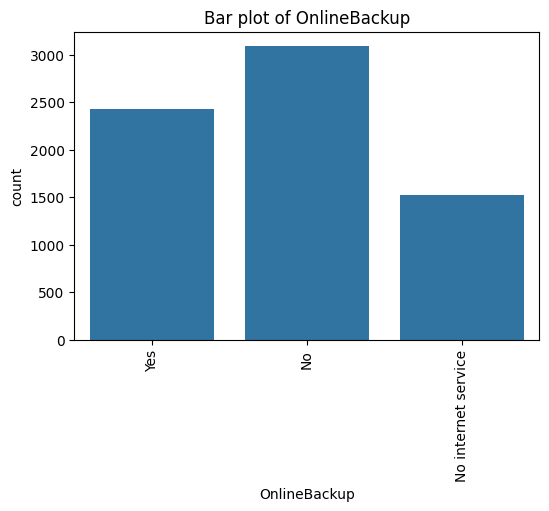

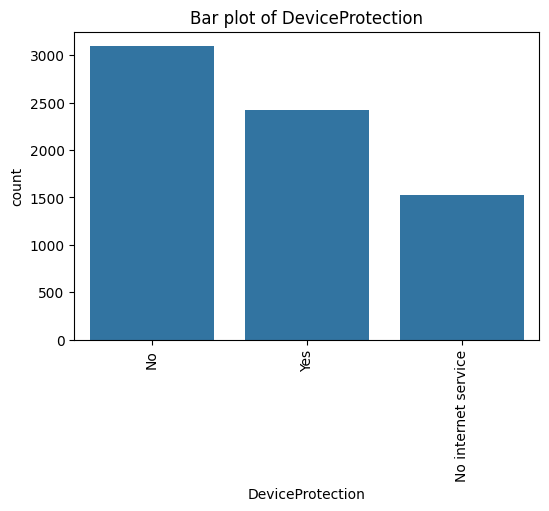

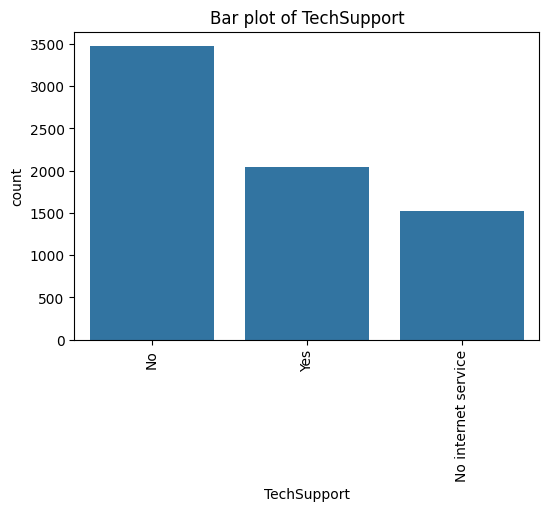

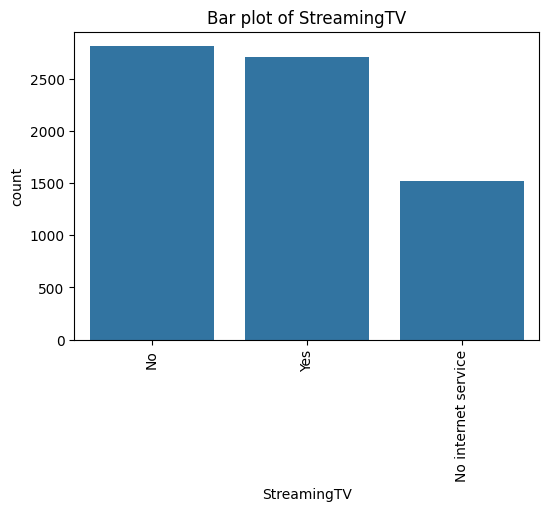

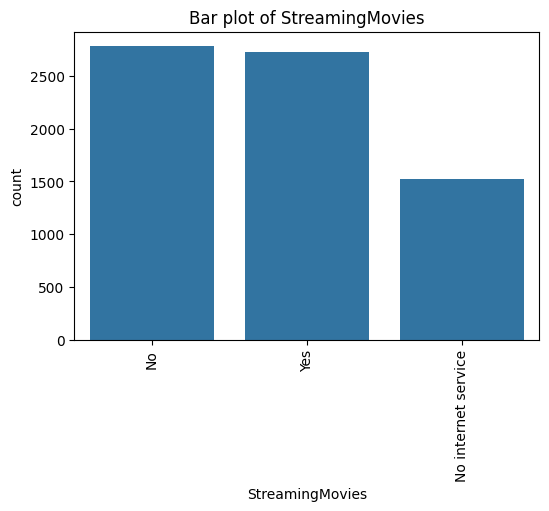

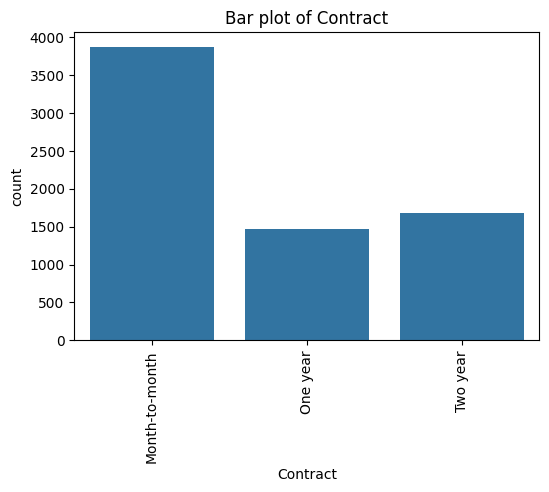

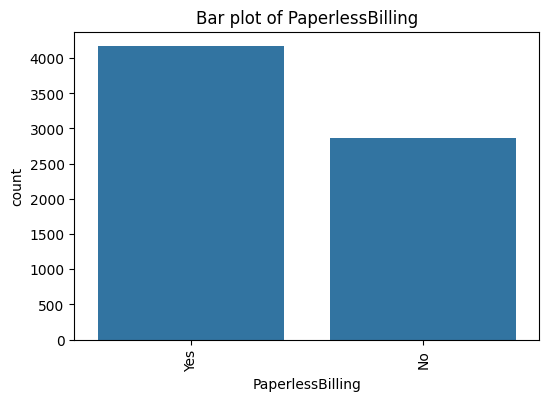

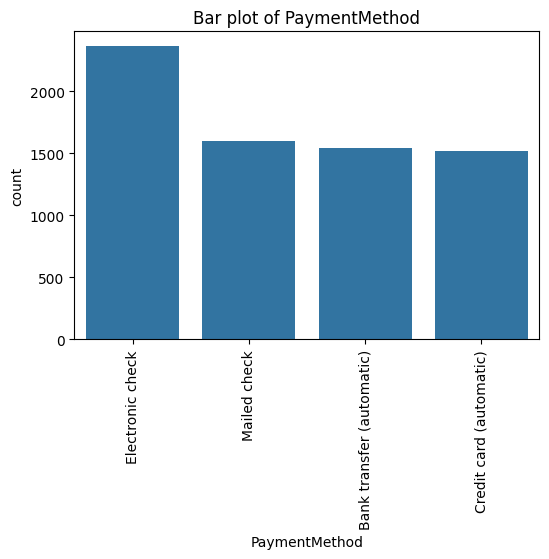

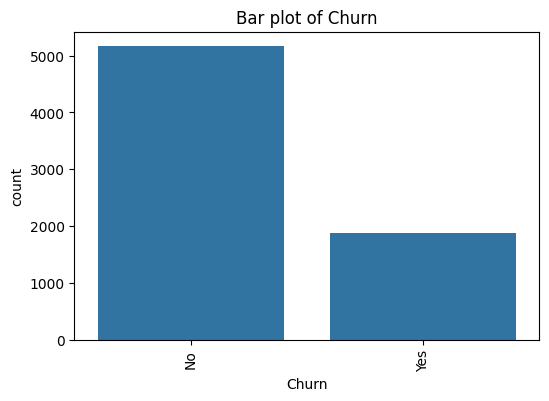

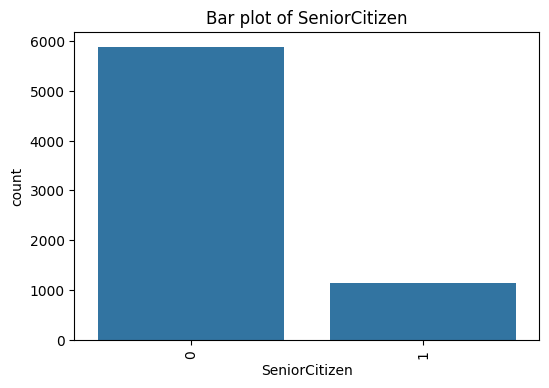

In [28]:
for col in catetgorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=raw_data, x=col)
    plt.title(f"Bar plot of {col}")
    plt.xticks(rotation=90)  # for long names
    plt.show()

### Categorical Columns Check

Upon inspecting all categorical columns, everything seems ok:  
- No unexpected values  
- No missing data  
- All categories appear consistent and ready for analysis


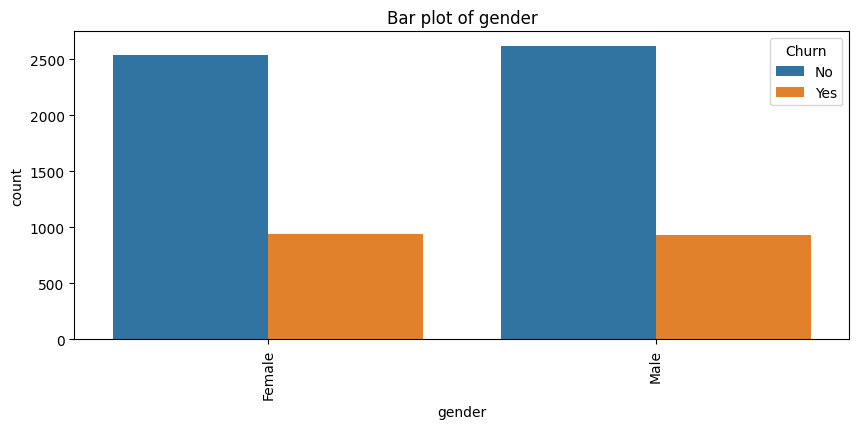

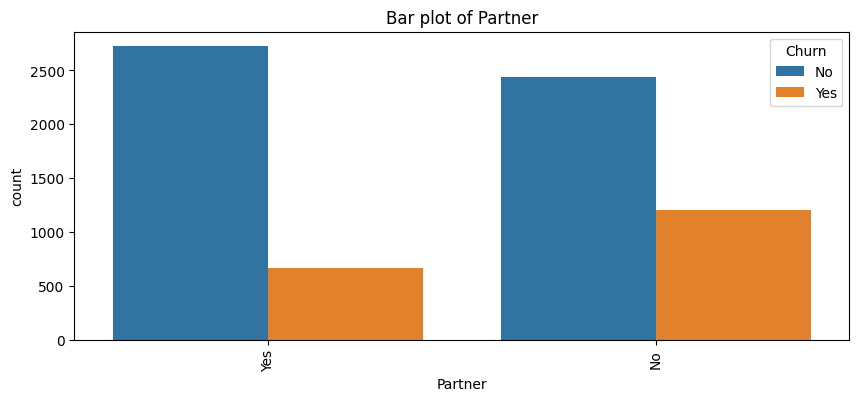

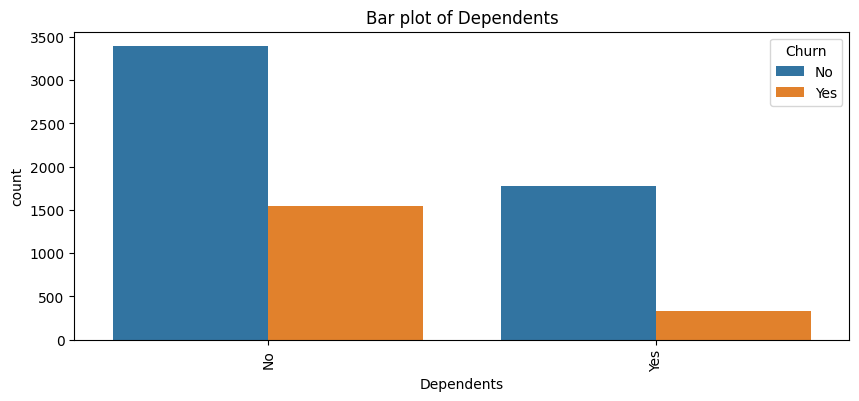

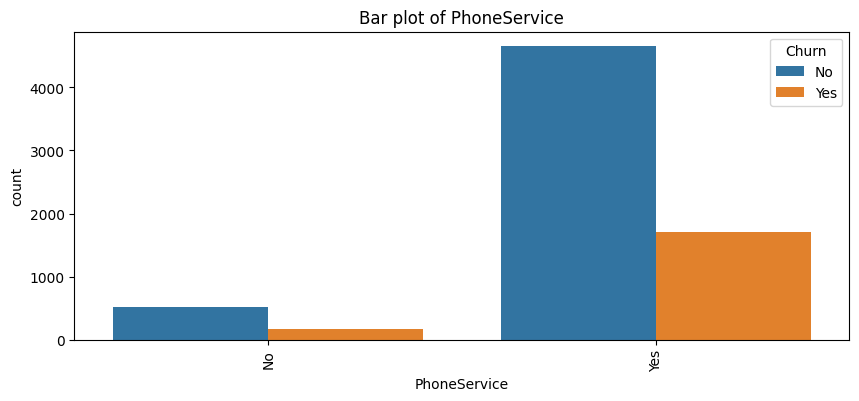

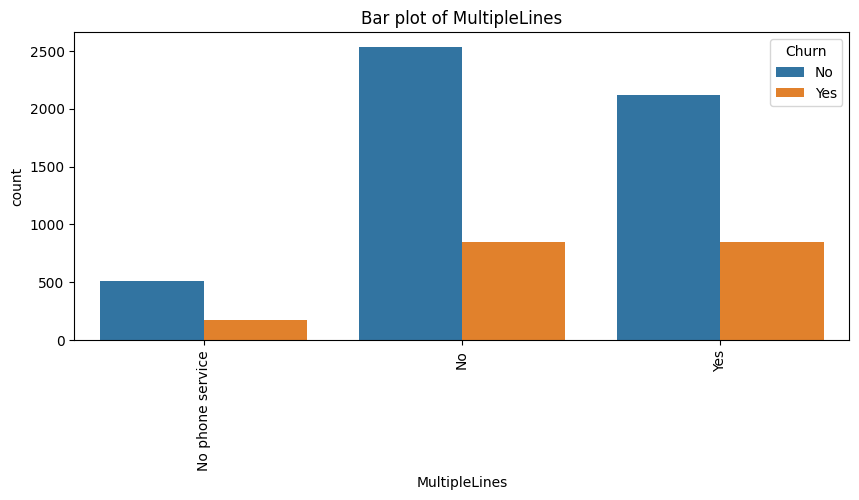

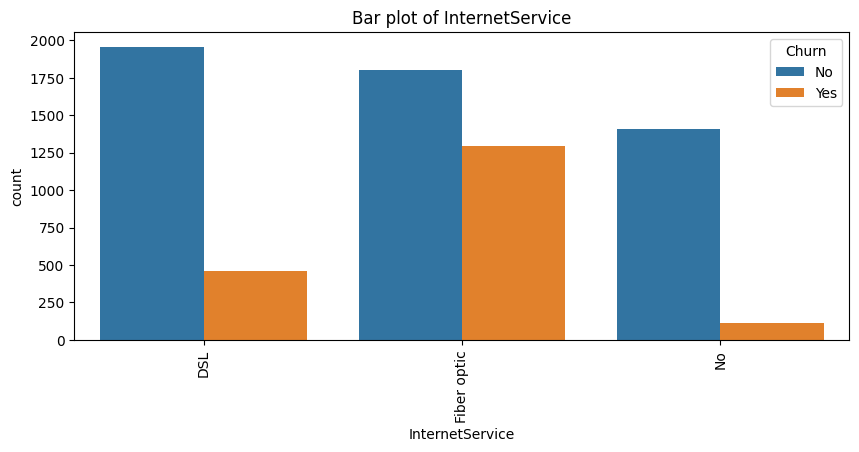

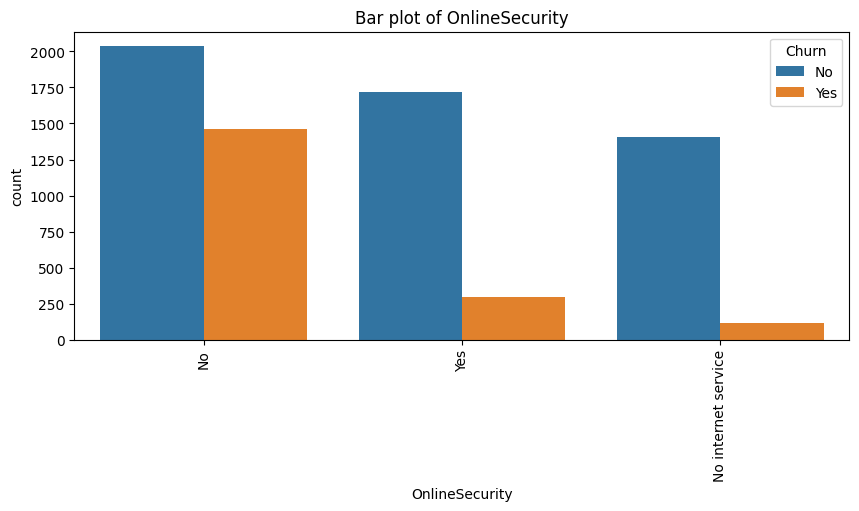

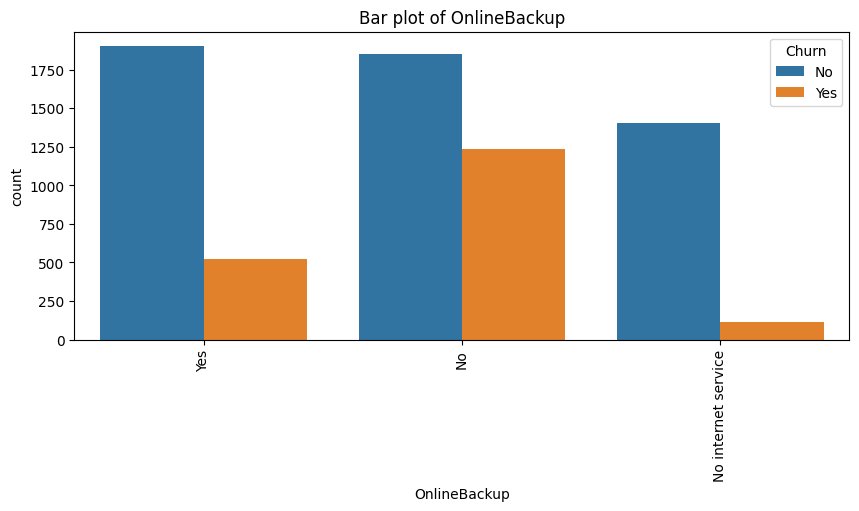

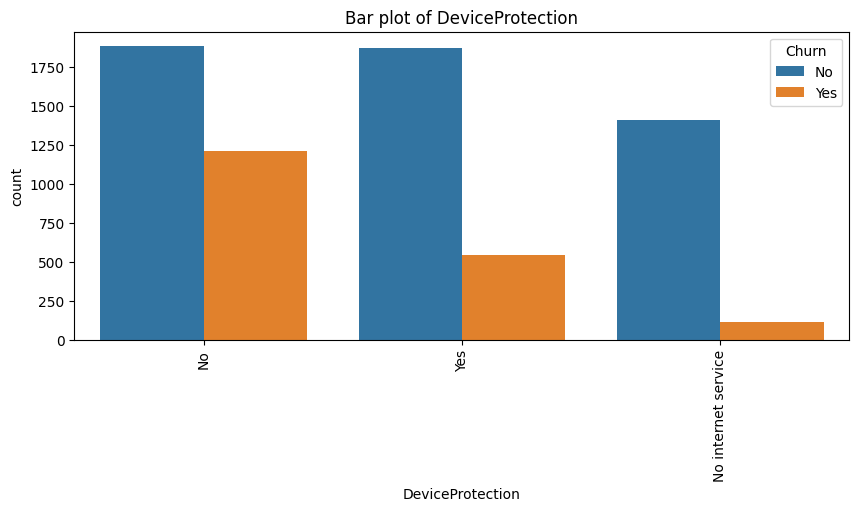

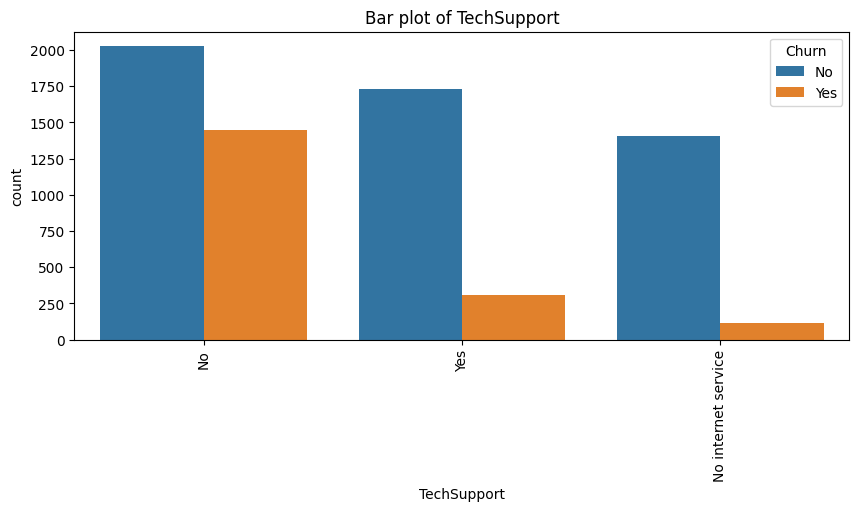

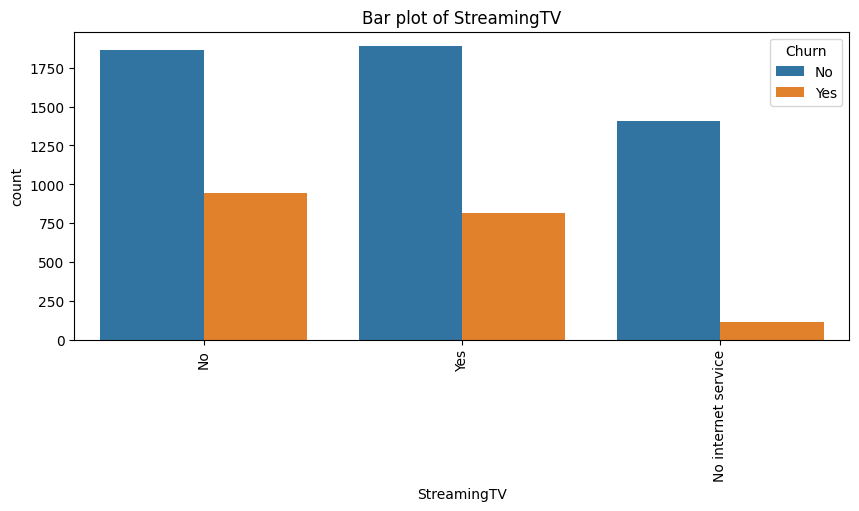

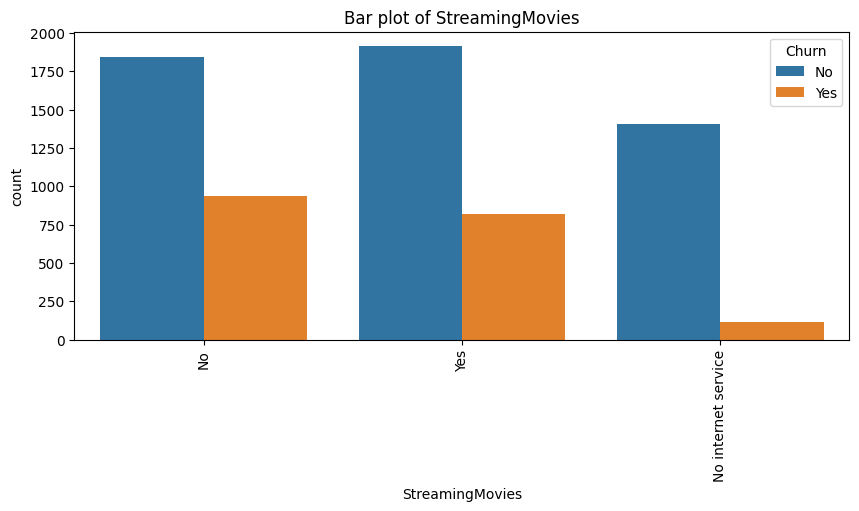

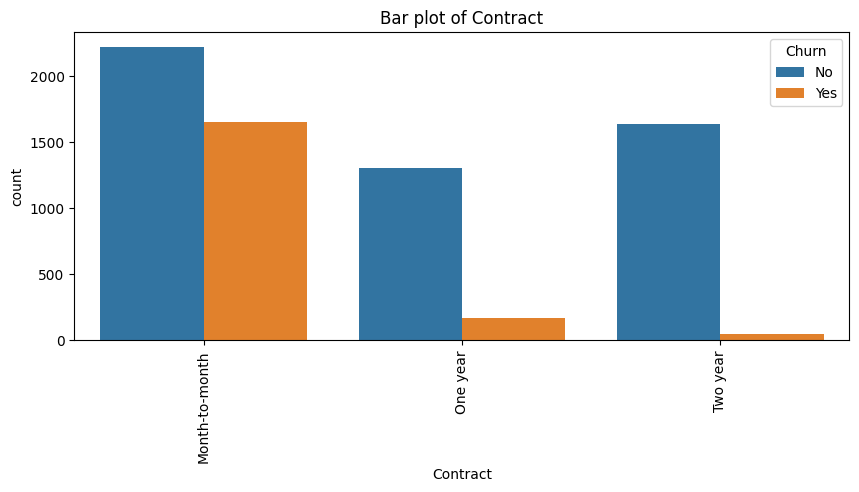

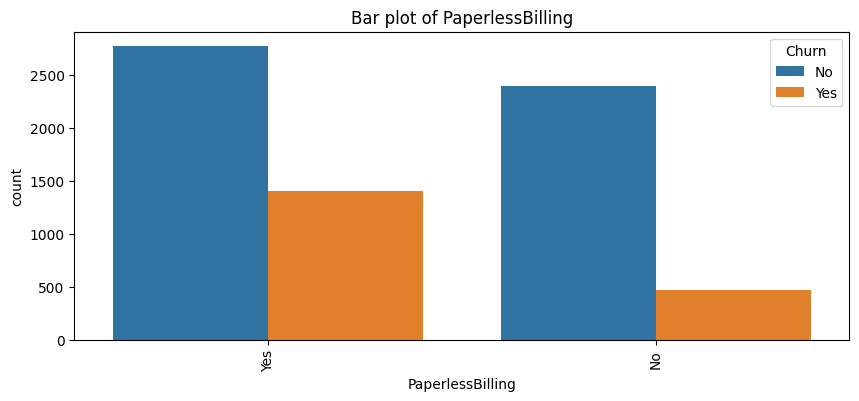

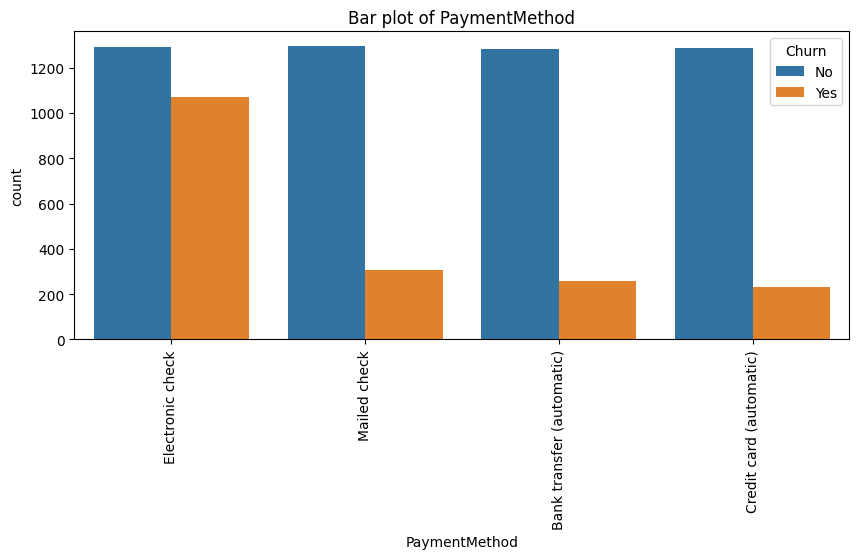

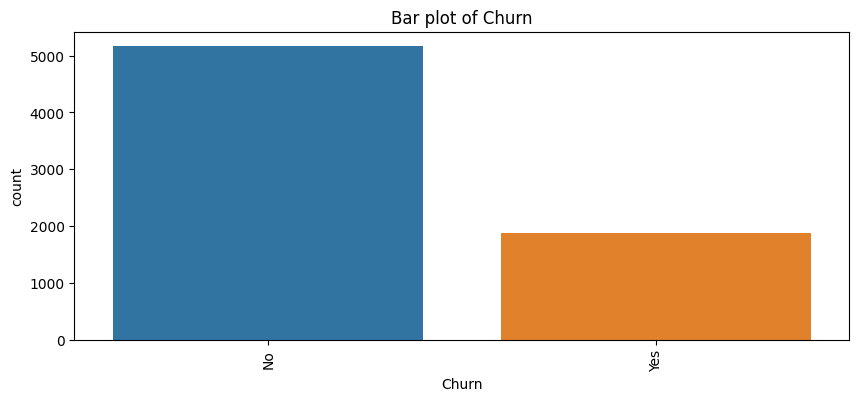

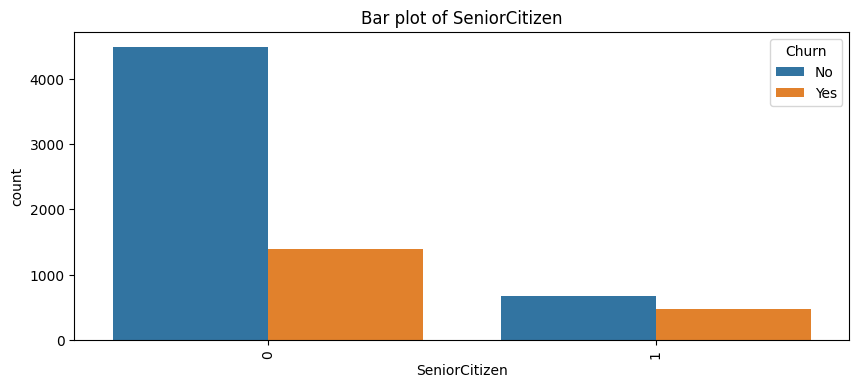

In [32]:
for col in catetgorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=raw_data, x=col, hue='Churn')
    plt.title(f"Bar plot of {col}")
    plt.xticks(rotation=90)  # for long names
    plt.show()

### Categorical Columns vs Churn Observations

- **Partner:** Customers without a partner are more likely to churn.  
- **Dependents:** Customers without dependents also show higher churn rates.  
- **MultipleLines:** Customers using multiple lines churn less.  
- **InternetService:** DSL users churn more than those without internet, while Fiber optic users churn the most.  
- **OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport:** Customers using these additional services have a significantly lower churn probability.  
- **Contract:** Month-to-month customers churn more compared to one-year, and one-year more than two-year contracts. Longer contract duration reduces churn likelihood.  
- **PaperlessBilling:** Customers with paperless billing churn much more.  
- **PaymentMethod:** Customers using electronic payment methods show higher churn.  
- **SeniorCitizen:** Seniors have a higher churn rate compared to non-seniors.


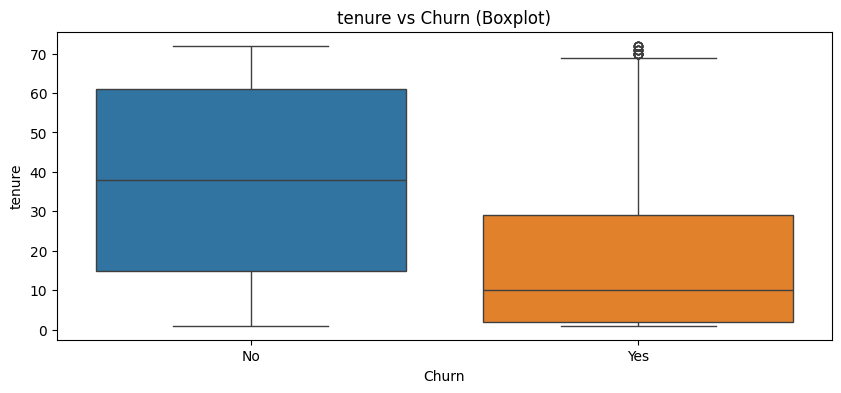

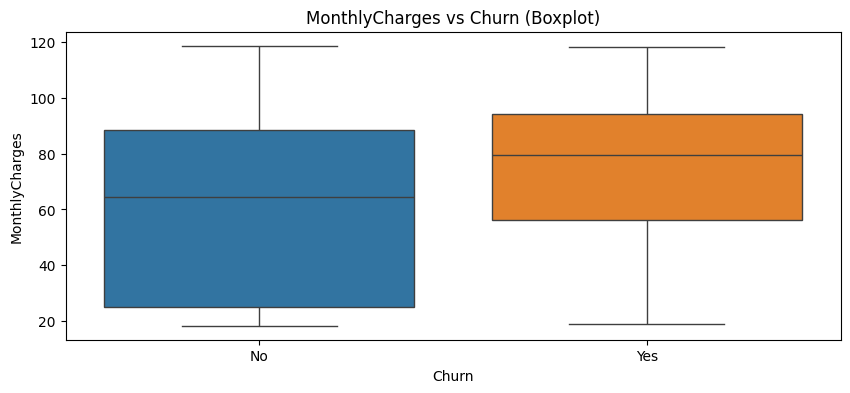

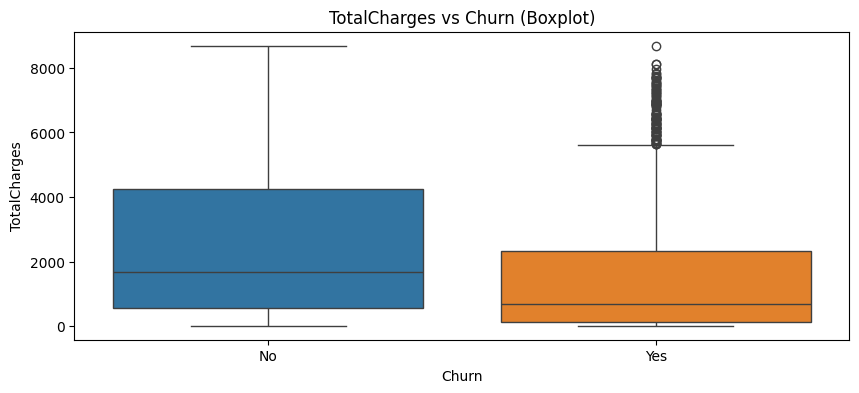

In [38]:
for col in numeric_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(data=raw_data, x='Churn', y=col, hue='Churn')
    plt.title(f"{col} vs Churn (Boxplot)")
    plt.show()

### Numeric Columns vs Churn Observations

- **Tenure:**  
  Most churned customers are concentrated between **0 and 40 months**, which is expected for newer customers.  
  Non-churned customers are more evenly distributed across the **full range of tenure** (0–70 months).

- **MonthlyCharges:**  
  Non-churned customers show a fairly normal distribution between **$20 and $100**.  
  Churned customers are mostly concentrated between **$60 and $100**, indicating they pay more on average.

- **TotalCharges:**  
  Churned customers are concentrated in the **$0–$3000** range, reflecting newer or smaller accounts.  
  Non-churned customers are distributed more widely, up to around **$5000**.


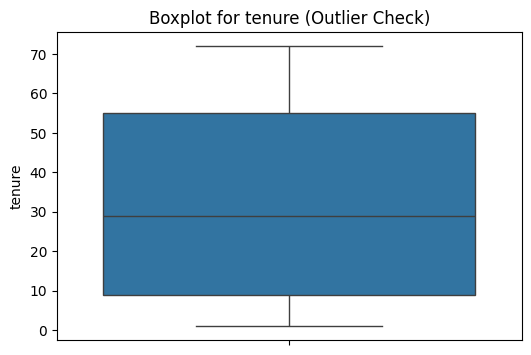

--- tenure ---
Number of outliers: 0
Outlier values:
[]




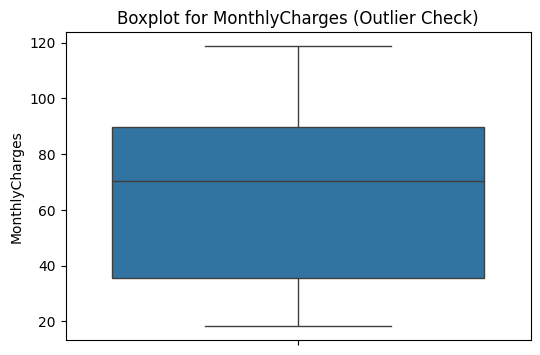

--- MonthlyCharges ---
Number of outliers: 0
Outlier values:
[]




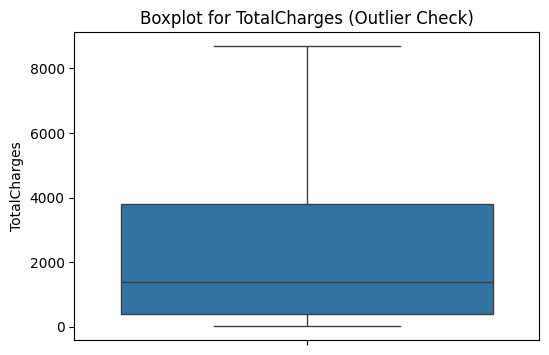

--- TotalCharges ---
Number of outliers: 0
Outlier values:
[]




In [43]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=raw_data, y=col)
    plt.title(f"Boxplot for {col} (Outlier Check)")
    plt.show()

    Q1 = raw_data[col].quantile(0.25)
    Q3 = raw_data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = raw_data[(raw_data[col] < Q1 - 1.5*IQR) | (raw_data[col] > Q3 + 1.5*IQR)]
    
    print(f"--- {col} ---")
    print(f"Number of outliers: {len(outliers)}")
    print("Outlier values:")
    print(outliers[col].values)
    print("\n")

### Numeric Columns Outlier Check

Upon inspecting the numeric columns (`tenure`, `MonthlyCharges`, `TotalCharges`) using boxplots and the IQR method,  
no significant outliers were detected in the dataset.